# Part II: Data Preprocessing

This tutorial is based on the [TensorFlow Image Classification](https://www.tensorflow.org/tutorials/images/classification) with some modifications, which shows how to classify images of fingerprints using a tf.keras.Sequential model and load data using tf.keras.utils.image_dataset_from_directory. 

This tutorial follows a basic machine learning workflow:

1. Examine and understand data
1. Build an input pipeline
1. Build the model
1. Train the model
1. Test the model
1. Improve the model and repeat the process

The workflow above spans multiple notebooks
1. data exploration
1. data preprocessing 
1. model training
1. model tuning

# Setup

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import clear_output

In [2]:
# scratch directory is apart of the .gitignore to ensure it is not committed to git
%env SCRATCH=../scratch
! [ -e "${SCRATCH}" ] || mkdir -p "${SCRATCH}"

scratch_path = os.environ.get('SCRATCH', './scratch')

env: SCRATCH=../scratch


# Resize and crop the images 

It is a best practice not to save over the raw data you have, so we will write these changes to a new directory:
1. resize all the images to 96, 96
1. crop the border
1. because the images will be smaller and we want to maintain the 96x96 input, resize them back

In [3]:
input_directory = scratch_path + "/train"  # Replace with the path to your input directory
output_directory = scratch_path + "/processed/hand"  # Replace with the path to your output directory

## Define the processing function

In [4]:
%%writefile ../src/process_images.py

import os
import cv2

CROP_TOP = 10
CROP_BOT = 96-15
CROP_L = 5
CROP_R = 96-6

def process_images_in_directory(input_directory, output_directory):
    # Create the output directory if it doesn't exist
    os.makedirs(output_directory, exist_ok=True)

    for filename in os.listdir(input_directory):
        file_path = os.path.join(input_directory, filename)

        if os.path.isdir(file_path):
            # If it's a subdirectory, recursively process its contents
            subdirectory_output = os.path.join(output_directory, filename)
            process_images_in_directory(file_path, subdirectory_output)
        elif filename.endswith(".png"):  # You can adjust the file extension as needed
            # Read the image using OpenCV
            image = cv2.imread(file_path)

            if image is not None:
                # Resize the image to 96x96
                resized_image = cv2.resize(image, (96, 96))

                # Crop the image to [5:95, 5:91]
                cropped_image = resized_image[CROP_TOP:CROP_BOT, CROP_L:CROP_R]
                
                #resized_image = cv2.resize(cropped_image, (96, 96))

                # Save the cropped and resized image to the output directory
                output_path = os.path.join(output_directory, filename)
                cv2.imwrite(output_path, cropped_image)

                print(f"Processed and saved {filename} to {output_path}")
            else:
                print(f"Skipping {filename}: Unable to read the image")

# Example usage:
# Replace "input_root_directory" and "output_root_directory" with your root input and output directory paths
# process_images_in_directory("input_root_directory", "output_root_directory")

Overwriting ../src/process_images.py


## Run the function

In [5]:
%run ../src/process_images.py

In [6]:
process_images_in_directory(input_directory, output_directory)

clear_output()

## Display a sample

In [7]:
# convert opencv BGR to RGB ordering
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

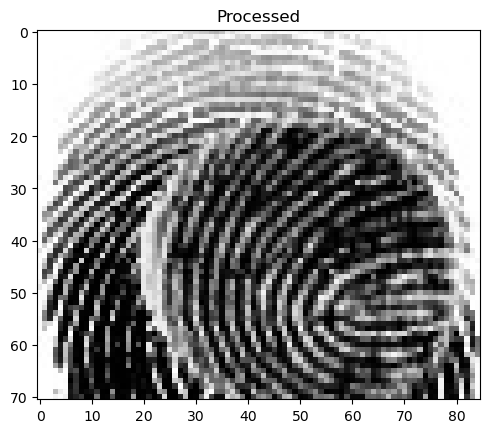

In [8]:
image = cv2.imread(scratch_path + '/processed/hand/left/1__M_Left_index_finger_CR.png')

plt_imshow("Processed", image)